# Pandas Exercises

## Creating DataFrames and Using Sample Data Sets

This is the Jupyter Notebook runnable exercises version of the article, [Pandas Practice Questions – Fifty-Two Examples to Make You an Expert](https://codesolid.com/pandas-practice-questions-twenty-one-examples-to-make-you-an-expert/).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb

**1.** Using NumPy, create a Pandas DataFrame with five rows and three columms:

In [85]:
df=pd.DataFrame([[1,2,3],[4,5,6],[7,8,9],[10,11,12],[13,14,15]],columns=["A","B","C"])

**2.** For a Pandas DataFrame created from a NumPy array, what is the default behavior for the labels for the columns?  For the rows?

Both start from 0,1,2 and so on.

**3.** Create a second DataFrame as above with five rows and three columns, setting the row labels to the names of any five major US cities and the column labels to the first three months of the year.

In [84]:
df_new=pd.DataFrame([[1,2,3],[4,5,6],[7,8,9],[10,11,12],[13,14,15]],columns=["January","February","March"],index=["NewYork","LosAngeles","SanFransisco","Chicago","Houston"])
print(df_new)

              January  February  March
NewYork             1         2      3
LosAngeles          4         5      6
SanFransisco        7         8      9
Chicago            10        11     12
Houston            13        14     15


**4.** You recall that the Seaborn package has some data sets built in, but can't remember how to list and load them. Assuming the functions to do so have "data" in the name, how might you locate them?  You can assume a Jupyter Notebook / IPython environment and explain the process, or write the code to do it in Python.

## Loading data from CSV

**5**. Zillow home data is available at this URL: https://files.zillowstatic.com/research/public_csvs/zhvi/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv

Open this file as a DataFrame named df_homes in Pandas.

In [6]:
df_homes=pd.read_csv("https://files.zillowstatic.com/research/public_csvs/zhvi/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")
# print(df_homes)

**6.** Save the DataFrame, df_homes, to a local CSV file, "zillow_home_data.csv".  

In [7]:
df_homes.to_csv("zillow_home_data.csv", index=False)


**7.** Load zillow_home_data.csv back into a new Dataframe, df_homes_2

In [8]:
df_homes_2=pd.read_csv("zillow_home_data.csv")

**8.** Compare the dimensions of the two DataFrames, df_homes and df_homes_2.  Are they equal?  If not, how can you fix it?

In [15]:
print(df_homes.shape)
print(df_homes_2.shape)

(895, 303)
(895, 303)


**9.** A remote spreadsheet showing how a snapshot of how traffic increased for a hypothetical website is available here: https://github.com/CodeSolid/CodeSolid.github.io/raw/main/booksource/data/AnalyticsSnapshot.xlsx. Load the worksheet page of the spreasheet data labelled "February 2022" as a DataFrame named "feb".  Note: the leftmost column in the spreadsheet is the index column.

In [16]:
feb=pd.read_excel('https://github.com/CodeSolid/CodeSolid.github.io/raw/main/booksource/data/AnalyticsSnapshot.xlsx')

**10.** The "Month to Month Increase" column is a bit hard to understand, so ignore it for now.  Given the values for "This Month" and "Last Month", create a new column, "Percentage Increase".

## Basic Operations on Data

**11.** Using Seaborn, get a dataset about penguins into a dataframe named "df_penguins".  Note that because all of the following questions depend on this example, we'll provide the solution here so no one gets stuck:

In [19]:
df_penguins = sb.load_dataset('penguins')

**12.** Write the code to show the the number of rows and columns in df_penguins

In [21]:
df_penguins.shape

(344, 7)

**13.** How might you show the first few rows of df_penguins?

In [24]:
df_penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


**14.** How can you return the unique species of penguins from df_penguins?  How many unique species are there?

In [33]:
a=df_penguins["species"].unique()
print(a)
print(len(a))

['Adelie' 'Chinstrap' 'Gentoo']
3


**15.** What function can we use to drop the rows that have missing data?

In [40]:
df_penguins.dropna(axis=0, how='any', subset=None, inplace=True)



**16.** By default, will this modify df_penguins or will it return a copy?

Both can be done by setting inplace as True or Fale


**17.** How can we override the default?

**18.** Create a new DataFrame, df_penguins_full, with the missing data deleted.

In [47]:
arr=df_penguins_full=df_penguins.dropna(axis=0, how='any', subset=None, inplace=False)
# print(arr.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
4       3450.0  Female  
5       3650.0    Male  


**19.** What is the average bill length of a penguin, in millimeters, in this (df_full) data set?

In [48]:
df_penguins_full['bill_length_mm'].mean()

43.99279279279279

**20.** Which of the following is most strongly correlated with bill length?  a) Body mass?  b) Flipper length?  c) Bill depth?  Show how you arrived at the answer.

In [81]:
df_penguins_full.corr(numeric_only=True)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


**21.** How could you show the median flipper length, grouped by species?

In [75]:
df_penguins_full.groupby('species')['flipper_length_mm'].median()

,flipper_length_mm
species,
Adelie,190.0
Chinstrap,196.0
Gentoo,216.0


**22.** Which species has the longest flippers?

Gentoo

In [78]:
df_penguins_full.groupby('species')['flipper_length_mm'].max()

,flipper_length_mm
species,
Adelie,210.0
Chinstrap,212.0
Gentoo,231.0


**23.** Which two species have the most similar mean weight?  Show how you arrived at the answer.

Adelie and Chinstrap


In [76]:
df_penguins_full.groupby('species')['body_mass_g'].mean()

,body_mass_g
species,
Adelie,3706.164384
Chinstrap,3733.088235
Gentoo,5092.436975


**24.** How could you sort the rows by bill length?

In [51]:
df_penguins_full.sort_values(by=['bill_length_mm'])

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
142,Adelie,Dream,32.1,15.5,188.0,3050.0,Female
98,Adelie,Dream,33.1,16.1,178.0,2900.0,Female
70,Adelie,Torgersen,33.5,19.0,190.0,3600.0,Female
92,Adelie,Dream,34.0,17.1,185.0,3400.0,Female
18,Adelie,Torgersen,34.4,18.4,184.0,3325.0,Female
...,...,...,...,...,...,...,...
335,Gentoo,Biscoe,55.1,16.0,230.0,5850.0,Male
215,Chinstrap,Dream,55.8,19.8,207.0,4000.0,Male
321,Gentoo,Biscoe,55.9,17.0,228.0,5600.0,Male
169,Chinstrap,Dream,58.0,17.8,181.0,3700.0,Female


**25.** How could you run the same sort in descending order?

In [52]:
df_penguins_full.sort_values(by=['bill_length_mm'],ascending=False)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
253,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,Male
169,Chinstrap,Dream,58.0,17.8,181.0,3700.0,Female
321,Gentoo,Biscoe,55.9,17.0,228.0,5600.0,Male
215,Chinstrap,Dream,55.8,19.8,207.0,4000.0,Male
335,Gentoo,Biscoe,55.1,16.0,230.0,5850.0,Male
...,...,...,...,...,...,...,...
18,Adelie,Torgersen,34.4,18.4,184.0,3325.0,Female
92,Adelie,Dream,34.0,17.1,185.0,3400.0,Female
70,Adelie,Torgersen,33.5,19.0,190.0,3600.0,Female
98,Adelie,Dream,33.1,16.1,178.0,2900.0,Female


**26.** How could you sort by species first, then by body mass?

In [50]:
df_penguins_full.sort_values(by=['species','body_mass_g'])

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
58,Adelie,Biscoe,36.5,16.6,181.0,2850.0,Female
64,Adelie,Biscoe,36.4,17.1,184.0,2850.0,Female
54,Adelie,Biscoe,34.5,18.1,187.0,2900.0,Female
98,Adelie,Dream,33.1,16.1,178.0,2900.0,Female
116,Adelie,Torgersen,38.6,17.0,188.0,2900.0,Female
...,...,...,...,...,...,...,...
331,Gentoo,Biscoe,49.8,15.9,229.0,5950.0,Male
297,Gentoo,Biscoe,51.1,16.3,220.0,6000.0,Male
337,Gentoo,Biscoe,48.8,16.2,222.0,6000.0,Male
253,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,Male


## Selecting Rows, Columns, and Cells

Let's look at some precious stones now, and leave the poor penguins alone for a while.  Let's look at some precious stones now, and leave the poor penguins alone for a while.  

**27.** Load the Seaborn "diamonds" dataset into a Pandas dataframe named diamonds.

In [53]:
df_diamonds = sb.load_dataset('diamonds')

**28.** Display the columns that are available.

In [57]:
print(df_diamonds.columns)

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')


**29.** If you select a single column from the diamonds DataFrame, what will be the type of the return value?

**30.** Select the 'table' column and show its type

In [74]:
df_diamonds['table'].dtype

dtype('float64')

**31.** Select the first ten rows of the price and carat columns ten rows of the diamonds DataFrame into a variable called subset, and display them.

In [62]:
subset=df_diamonds.loc[0:9,["price","carat"]]
print(subset)

   price  carat
0    326   0.23
1    326   0.21
2    327   0.23
3    334   0.29
4    335   0.31
5    336   0.24
6    336   0.24
7    337   0.26
8    337   0.22
9    338   0.23


**32.** For a given column, show the code to display the datatype of the _values_ in the column?  

In [63]:
df_diamonds['price'].dtype

dtype('int64')

**33.** Select the first row of the diamonds DataFrame into a variable called row.

In [64]:
row=df_diamonds.loc[0]

**34.** What would you expect the data type of the row to be?  Display it.

A Pandas series

In [65]:
row.info()

<class 'pandas.core.series.Series'>
Index: 10 entries, carat to z
Series name: 0
Non-Null Count  Dtype 
--------------  ----- 
10 non-null     object
dtypes: object(1)
memory usage: 460.0+ bytes


**35.** Can you discover the names of the columns using only the row returned in #33?  Why or why not?Can you discover the names of the columns using only the row returned in #33?  Why or why not?

Yes, because a row series should have the columns as the index (See below):

In [67]:
row.index

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

**36.** Select the row with the highest priced diamond.

In [71]:
df_diamonds.loc[df_diamonds['price'].idxmax()]

,27749
carat,2.29
cut,Premium
color,I
clarity,VS2
depth,60.8
table,60.0
price,18823
x,8.5
y,8.47
z,5.16


**37.** Select the row with the lowest priced diamond.

In [72]:
df_diamonds.loc[df_diamonds['price'].idxmin()]

,0
carat,0.23
cut,Ideal
color,E
clarity,SI2
depth,61.5
table,55.0
price,326
x,3.95
y,3.98
z,2.43


## Some Exercises Using Time Series

**38.** Load the taxis dataset into a DataFrame, ```taxis```.

In [3]:

taxis = sb.load_dataset("taxis")

**39.** The 'pickup' column contains the date and time the customer picked up, but it's a string.  Add a column to the DataFrame, 'pickup_time', containing the value in 'pickup' as a DateTime.

In [4]:
taxis['pickup_time']=pd.to_datetime(taxis['pickup'])

**40.** We have a hypothesis that as the day goes on, the tips get higher.  We'll need to wrangle the data a bit before testing this, however.  First, now that we have a datetime column, pickup_time, create a subset of it to create a new DataFrame, taxis_one_day. This new DataFrame should have values between '2019-03-23 00:06:00' (inclusive) and '2019-03-24 00:00:00' (exlusive).

In [5]:
taxis_one_day = taxis[(taxis['pickup_time'] >= '2019-03-23 00:06:00') & (taxis['pickup_time'] < '2019-03-24 00:00:00')]
print(taxis_one_day)

                  pickup             dropoff  passengers  distance  fare  \
0    2019-03-23 20:21:09 2019-03-23 20:27:24           1      1.60   7.0   
8    2019-03-23 11:48:50 2019-03-23 12:06:14           1      3.63  15.0   
17   2019-03-23 20:50:49 2019-03-23 21:02:07           1      2.60  10.5   
117  2019-03-23 09:39:25 2019-03-23 09:56:45           0      3.60  15.5   
144  2019-03-23 18:35:01 2019-03-23 18:47:39           1      3.20  12.5   
...                  ...                 ...         ...       ...   ...   
6325 2019-03-23 20:52:40 2019-03-23 21:10:12           1      3.62  14.5   
6331 2019-03-23 11:27:00 2019-03-23 12:20:11           1      7.67  28.0   
6338 2019-03-23 18:05:38 2019-03-23 18:25:36           1      2.82  14.0   
6427 2019-03-23 18:26:09 2019-03-23 18:49:12           1      7.07  20.0   
6430 2019-03-23 22:55:18 2019-03-23 23:14:25           1      4.14  16.0   

       tip  tolls  total   color      payment                     pickup_zone  \
0     

**41.** We now have a range from morning until midnight, but we to take the mean of the numeric columns, grouped at one hour intervals.  Save the result as df_means, and display it.

In [6]:
taxis_one_day.set_index('pickup_time', inplace=True)
numeric_columns = taxis_one_day.select_dtypes(include='number')
df_means = numeric_columns.resample('h').mean()

**42.** Create a simple line plot of the value "distance".  

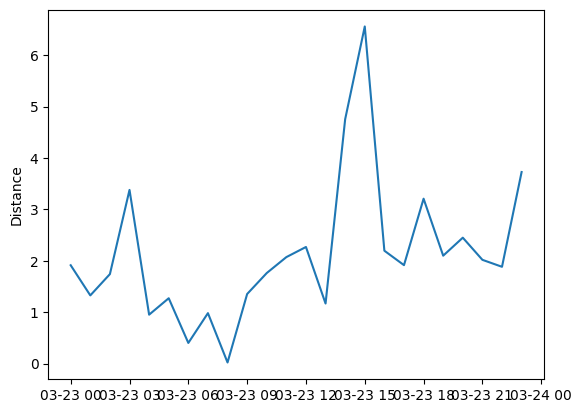

In [7]:
import matplotlib.pyplot as plt
plt.ylabel('Distance')
plt.plot(df_means.distance)

**43.** Overall, do riders travel further or less far as the day progresses?

max in afternoon.

**44.** Create a new column in taxis_means, ```tip_in_percent```.  The source columns for this should be "fare" and "tip"

In [8]:
df_means["tip_in_percent"]=100*df_means["tip"]/df_means["fare"]
print(df_means)

                     passengers  distance       fare       tip     tolls  \
pickup_time                                                                
2019-03-23 00:00:00    1.000000  1.911667   8.583333  1.415000  0.000000   
2019-03-23 01:00:00    1.250000  1.325000   7.875000  1.525000  0.000000   
2019-03-23 02:00:00    1.727273  1.739091   8.181818  1.641818  0.000000   
2019-03-23 03:00:00    1.500000  3.377500  11.750000  2.410000  0.000000   
2019-03-23 04:00:00    2.000000  0.950000   5.500000  0.915000  0.000000   
2019-03-23 05:00:00    2.000000  1.270000   6.000000  0.980000  0.000000   
2019-03-23 06:00:00    1.000000  0.400000  21.500000  0.000000  0.000000   
2019-03-23 07:00:00    2.333333  0.980000   5.250000  1.165000  0.000000   
2019-03-23 08:00:00    1.000000  0.020000   2.500000  0.000000  0.000000   
2019-03-23 09:00:00    1.500000  1.352000   7.400000  1.674000  0.000000   
2019-03-23 10:00:00    1.000000  1.760000   8.750000  0.727500  0.000000   
2019-03-23 1

**45.** Create a new column, time_interval, as a range of integer values beginning with zero.

In [9]:
df_means["time_interval"]=range(len(df_means))
df_means

,passengers,distance,fare,tip,tolls,total,tip_in_percent,time_interval
pickup_time,,,,,,,,
2019-03-23 00:00:00,1.000000,1.911667,8.583333,1.415000,0.000000,12.965000,16.485437,0
2019-03-23 01:00:00,1.250000,1.325000,7.875000,1.525000,0.000000,12.575000,19.365079,1
2019-03-23 02:00:00,1.727273,1.739091,8.181818,1.641818,0.000000,13.169091,20.066667,2
2019-03-23 03:00:00,1.500000,3.377500,11.750000,2.410000,0.000000,17.335000,20.510638,3
2019-03-23 04:00:00,2.000000,0.950000,5.500000,0.915000,0.000000,10.215000,16.636364,4
2019-03-23 05:00:00,2.000000,1.270000,6.000000,0.980000,0.000000,10.530000,16.333333,5
2019-03-23 06:00:00,1.000000,0.400000,21.500000,0.000000,0.000000,23.133333,0.000000,6
2019-03-23 07:00:00,2.333333,0.980000,5.250000,1.165000,0.000000,9.298333,22.190476,7
2019-03-23 08:00:00,1.000000,0.020000,2.500000,0.000000,0.000000,3.300000,0.000000,8


Display the correlations between the following pairs of values:
1. tip_in_percent and distance.
1. tip_in_percent and passengers.
1. tip_in_percent and time_interval.

**47.** Admittedly, the size of the data set is fairly small given how we've subsetted it.  But based on the values in #45, which of the three pairs show the strongest correlation.

tip_in_percent and passengers

**48.** Did our hypothesis that people tip more as the day goes on turn out to be warranted?

no.

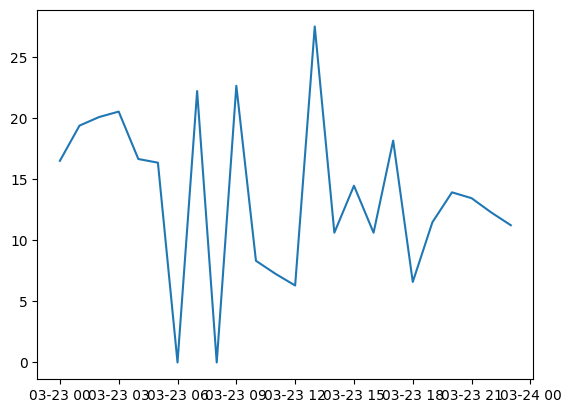

In [10]:
import matplotlib.pyplot as plt
plt.plot(df_means.tip_in_percent)